In [1]:
import pandas as pd

In [2]:
data1=pd.read_excel('附件1.xlsx')
data1

,单品编码,单品名称,分类编码,分类名称
0,102900005115168,牛首生菜,1011010101,花叶类
1,102900005115199,四川红香椿,1011010101,花叶类
2,102900005115625,本地小毛白菜,1011010101,花叶类
3,102900005115748,白菜苔,1011010101,花叶类
4,102900005115762,苋菜,1011010101,花叶类
...,...,...,...,...
246,106958851400125,海鲜菇(袋)(4),1011010801,食用菌
247,106971533450003,海鲜菇(包),1011010801,食用菌
248,106971533455008,海鲜菇(袋)(3),1011010801,食用菌
249,106973223300667,虫草花(盒)(2),1011010801,食用菌


In [3]:
data2=pd.read_csv('附件2.csv',encoding='gbk')
data2

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,销售,否
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,销售,否
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,销售,否
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,销售,否
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,销售,否
...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,销售,否
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,销售,否
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,销售,否
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,销售,否


In [4]:
data2.columns


Index(['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售'], dtype='object')

In [5]:
#基于单品编码列合并两个数据集
merged_data = pd.merge(data1, data2, left_on="单品编码", right_on="单品编码", how="outer")

merged_data


merged_data

,单品编码,单品名称,分类编码,分类名称,销售日期,扫码销售时间,销量(千克),销售单价(元/千克),销售类型,是否打折销售
0,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:02:13.748,0.743,5.0,销售,否
1,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,10:48:42.707,0.502,5.0,销售,否
2,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,11:10:13.023,0.301,5.0,销售,否
3,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,12:34:32.084,0.382,5.0,销售,否
4,102900005115168,牛首生菜,1011010101,花叶类,2020-10-30,13:33:59.748,0.261,5.0,销售,否
...,...,...,...,...,...,...,...,...,...,...
878503,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:26:46.053,1.000,1.5,销售,是
878504,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:47:51.842,1.000,2.5,销售,否
878505,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-28,20:48:23.670,1.000,1.5,销售,是
878506,106973990980123,和丰阳光海鲜菇(包),1011010801,食用菌,2022-07-29,18:42:16.217,1.000,2.5,销售,否


In [100]:
import numpy as np
#透视数据以按日期获取每个类别的销售额
pivot_data = merged_data.pivot_table(index="销售日期", columns="单品名称", values="销量(千克)", aggfunc=np.sum)
pivot_data.fillna(method='bfill',inplace=True)
pivot_data.fillna(method='ffill',inplace=True)



In [108]:
pivot_data

单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
销售日期,,,,,,,,,,,,,,,,,,,,,
2020-07-01,1.909,0.996,2.0,11.476,4.0,1.392,1.173,32.579,5.0,41.966,...,14.400,0.546,6.549,0.074,0.377,0.224,1.0,0.482,1.0,9.212
2020-07-02,1.825,0.996,2.0,6.806,4.0,1.392,1.173,27.056,5.0,44.873,...,14.400,0.546,4.811,0.074,0.377,0.224,1.0,0.482,1.0,9.212
2020-07-03,1.581,0.996,2.0,13.120,4.0,3.478,1.173,36.709,5.0,36.309,...,14.400,0.546,9.991,0.074,0.377,0.224,1.0,0.482,1.0,9.212
2020-07-04,0.693,0.996,2.0,28.186,4.0,4.908,1.173,43.330,5.0,51.205,...,14.400,0.546,18.431,0.074,0.377,0.224,1.0,0.482,1.0,9.212
2020-07-05,1.395,0.996,2.0,12.038,4.0,3.625,1.173,12.594,5.0,34.249,...,14.400,0.546,14.811,0.074,0.377,0.224,1.0,0.482,1.0,9.212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0.298,1.506,1.0,1.420,3.0,5.665,0.864,0.573,14.0,7.971,...,0.381,2.092,0.591,0.168,0.570,0.638,2.0,0.186,1.0,0.502
2023-06-27,0.298,2.101,1.0,1.823,3.0,5.665,0.864,0.293,18.0,0.251,...,0.381,2.092,0.591,0.168,0.570,0.638,2.0,0.186,1.0,0.502
2023-06-28,0.298,1.528,1.0,5.553,3.0,5.665,0.864,0.293,21.0,2.904,...,0.381,2.092,0.591,0.168,0.570,0.638,2.0,0.186,1.0,0.502


In [112]:
import pandas as pd
from scipy.stats import kendalltau


# 使用pivot_table将数据重排
pivot_df = pivot_data.reset_index().melt(id_vars='销售日期', var_name='Observer', value_name='Rank')



# 计算Kendall's Tau系数和p值
tau, p_value = kendalltau(pivot_df['销售日期'], pivot_df['Rank'])

print("Kendall's Tau系数:", tau)
print("p值:", p_value)

Kendall's Tau系数: -0.06234936890311886
p值: 0.0


In [113]:
# 计算每对类别的Spearman相关性
spearman_matrix = pivot_data_clean.corr(method="spearman")

spearman_matrix


单品名称,七彩椒(1),七彩椒(2),七彩椒(份),上海青,上海青(份),东门口小白菜,丝瓜尖,云南油麦菜,云南油麦菜(份),云南生菜,...,黄心菜(2),黄白菜(1),黄白菜(2),黄花菜,黑油菜,黑牛肝菌,黑牛肝菌(盒),黑皮鸡枞菌,黑皮鸡枞菌(盒),龙牙菜
单品名称,,,,,,,,,,,,,,,,,,,,,
七彩椒(1),1.000000,-0.313095,-0.429397,0.007300,0.410515,0.193854,-0.084059,0.038295,0.143164,0.007924,...,-0.014560,-0.009109,0.028923,0.233843,0.111288,0.123176,0.427625,0.056411,-0.036944,-0.005110
七彩椒(2),-0.313095,1.000000,0.245171,0.062672,-0.401452,-0.068157,0.184782,0.042110,0.204035,-0.009187,...,-0.224425,0.195866,0.046589,-0.239243,-0.268052,0.087201,-0.228616,0.093599,0.006899,-0.181289
七彩椒(份),-0.429397,0.245171,1.000000,0.268208,-0.276611,-0.315280,0.236983,0.418038,-0.531151,0.385282,...,0.479807,-0.512432,0.331121,-0.663260,-0.361335,-0.656581,-0.921070,0.377102,0.027796,0.581992
上海青,0.007300,0.062672,0.268208,1.000000,-0.035033,0.122901,0.263696,0.478678,-0.049866,0.395888,...,0.083867,-0.134930,0.424088,-0.410409,-0.297601,-0.068850,-0.293131,0.247590,-0.048008,0.138435
上海青(份),0.410515,-0.401452,-0.276611,-0.035033,1.000000,0.072983,-0.242847,0.070666,-0.063408,0.154379,...,0.302817,-0.280916,0.167867,0.298385,0.375939,-0.163764,0.267383,-0.108874,0.031470,0.355233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黑牛肝菌,0.123176,0.087201,-0.656581,-0.068850,-0.163764,0.293005,-0.010874,-0.415825,0.686895,-0.474060,...,-0.736884,0.771436,-0.438636,0.387456,-0.005502,1.000000,0.612246,-0.250664,-0.018476,-0.876155
黑牛肝菌(盒),0.427625,-0.228616,-0.921070,-0.293131,0.267383,0.214057,-0.335345,-0.465982,0.558130,-0.407844,...,-0.447408,0.477830,-0.381754,0.729833,0.437074,0.612246,1.000000,-0.409417,0.030569,-0.542693
黑皮鸡枞菌,0.056411,0.093599,0.377102,0.247590,-0.108874,0.209689,0.400627,0.265498,-0.224795,0.238995,...,0.183177,-0.195632,0.318976,-0.506156,-0.525049,-0.250664,-0.409417,1.000000,-0.012516,0.222188


In [115]:
spearman_matrix.to_excel('spearman_matrix.xlsx')

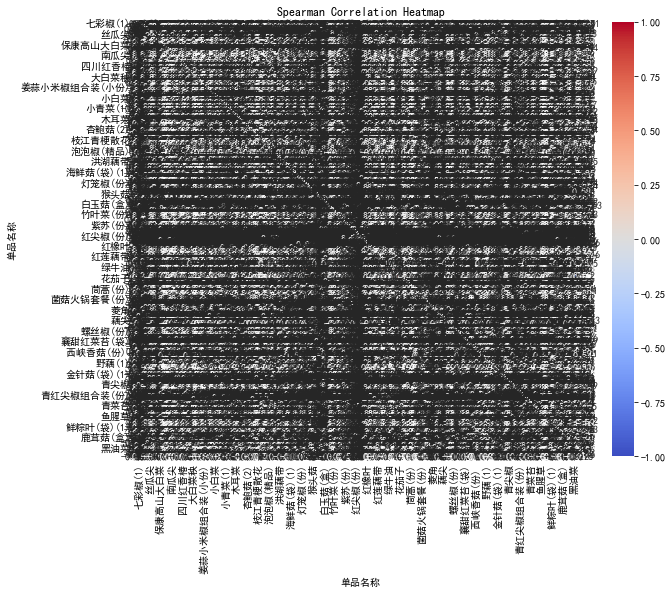

In [114]:
# 绘制各个变量之间的相关性
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap")
plt.savefig('单品Correlation.jpg')
plt.show()
